<a href="https://colab.research.google.com/github/Rishirajbal/UNET-plus-2_Brain_Tumour_Segmentation/blob/main/UNET%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

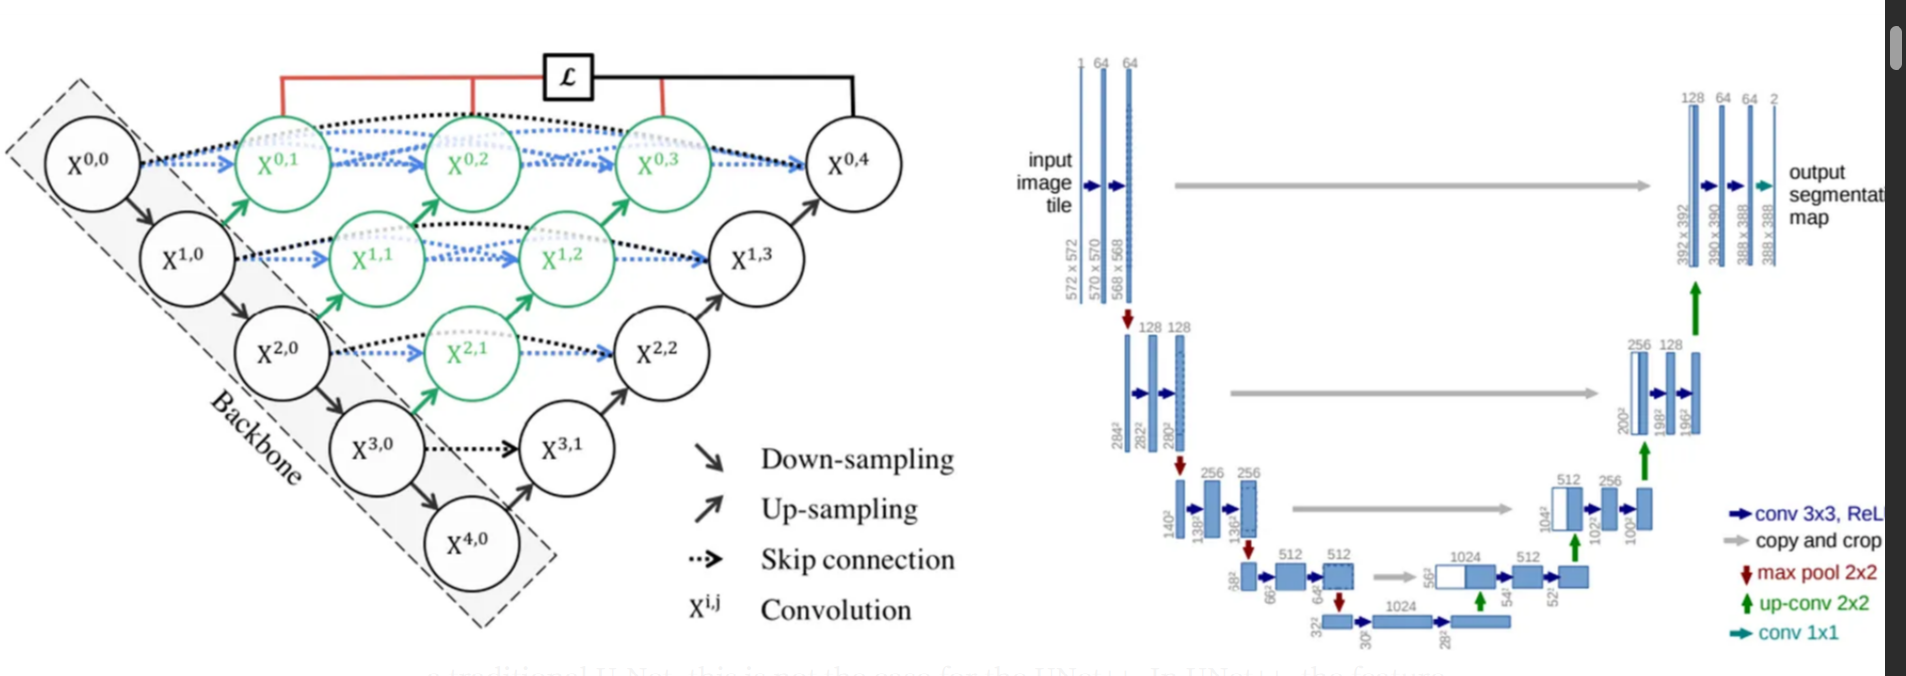

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Dense, Flatten, Conv2D, Conv2DTranspose, Input, Activation,
    MaxPooling2D, Dropout, BatchNormalization, UpSampling2D, Concatenate
)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def conv_block(x, filters):
    x = Conv2D(filters, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return x


def encoder(x, filters):
    c = conv_block(x, filters)
    p = MaxPooling2D(pool_size=(2, 2))(c)
    return c, p


def decoder(x, skip, filters):
    x = UpSampling2D(size=(2, 2))(x)
    x = Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x


In [ ]:
#AI generated
def build_unet(input_shape=(256, 256, 3), num_classes=1):
    inputs = Input(input_shape)

    # Encoder
    x0_0, p0 = encoder(inputs, 64)
    x1_0, p1 = encoder(p0, 128)
    x2_0, p2 = encoder(p1, 256)
    x3_0, p3 = encoder(p2, 512)
    x4_0 = conv_block(p3, 1024)

    # Nested decoder
    x3_1 = decoder(x4_0, x3_0, 512)

    x2_1 = decoder(x3_1, x2_0, 256)
    x2_2 = decoder(x3_1, Concatenate()([x2_0, x2_1]), 256)

    x1_1 = decoder(x2_1, x1_0, 128)
    x1_2 = decoder(x2_2, Concatenate()([x1_0, x1_1]), 128)
    x1_3 = decoder(x2_2, Concatenate()([x1_0, x1_1, x1_2]), 128)

    x0_1 = decoder(x1_1, x0_0, 64)
    x0_2 = decoder(x1_2, Concatenate()([x0_0, x0_1]), 64)
    x0_3 = decoder(x1_3, Concatenate()([x0_0, x0_1, x0_2]), 64)

    outputs = Conv2D(num_classes, 1, activation='sigmoid')(x0_3)

    return Model(inputs, outputs)


def build_net():
    model = build_unet()
    return model


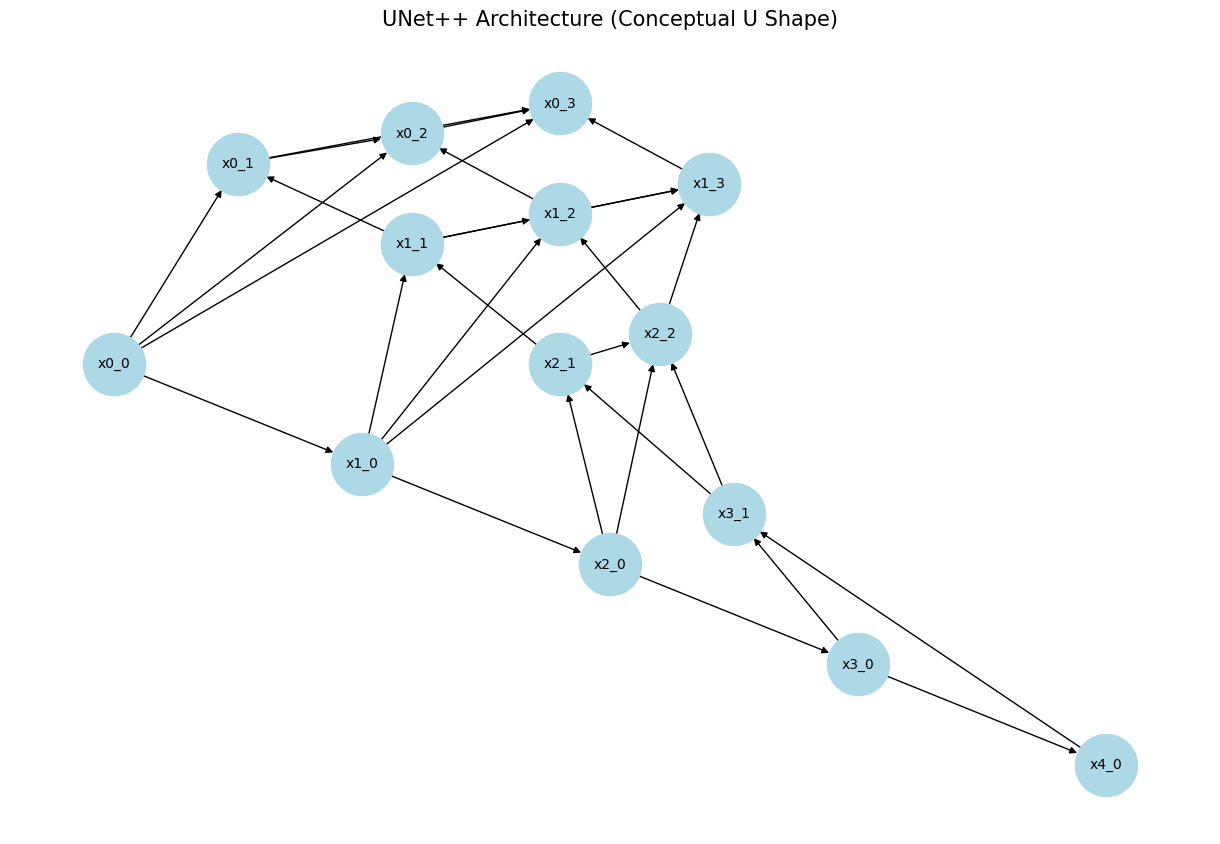

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_unet_plus_plus():
    G = nx.DiGraph()

    # Encoder layers
    encoder_layers = ['x0_0', 'x1_0', 'x2_0', 'x3_0', 'x4_0']
    for i in range(len(encoder_layers) - 1):
        G.add_edge(encoder_layers[i], encoder_layers[i + 1])

    # Decoder layers
    decoder_layers = [
        ('x4_0', 'x3_1'),
        ('x3_0', 'x3_1'),
        ('x3_1', 'x2_1'),
        ('x2_0', 'x2_1'),
        ('x3_1', 'x2_2'),
        ('x2_0', 'x2_2'),
        ('x2_1', 'x2_2'),
        ('x2_1', 'x1_1'),
        ('x1_0', 'x1_1'),
        ('x2_2', 'x1_2'),
        ('x1_0', 'x1_2'),
        ('x1_1', 'x1_2'),
        ('x2_2', 'x1_3'),
        ('x1_0', 'x1_3'),
        ('x1_1', 'x1_3'),
        ('x1_2', 'x1_3'),
        ('x1_1', 'x0_1'),
        ('x0_0', 'x0_1'),
        ('x1_2', 'x0_2'),
        ('x0_0', 'x0_2'),
        ('x0_1', 'x0_2'),
        ('x1_3', 'x0_3'),
        ('x0_0', 'x0_3'),
        ('x0_1', 'x0_3'),
        ('x0_2', 'x0_3')
    ]

    G.add_edges_from(decoder_layers)


    pos = {}
    for i, layer in enumerate(encoder_layers):
        pos[layer] = (i, -i)

    pos['x3_1'] = (2.5, -1.5)
    pos['x2_1'] = (1.8, 0)
    pos['x2_2'] = (2.2, 0.3)
    pos['x1_1'] = (1.2, 1.2)
    pos['x1_2'] = (1.8, 1.5)
    pos['x1_3'] = (2.4, 1.8)
    pos['x0_1'] = (0.5, 2)
    pos['x0_2'] = (1.2, 2.3)
    pos['x0_3'] = (1.8, 2.6)


    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrows=True)
    plt.title("UNet++ Architecture (Conceptual U Shape)", fontsize=15)
    plt.show()

plot_unet_plus_plus()


In [ ]:
model = build_net()

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_6[0][0]  

 Total params: 53,065,985 (202.43 MB)

 Trainable params: 53,044,481 (202.35 MB)

 Non-trainable params: 21,504 (84.00 KB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/Brain_data/train/images
!mkdir -p /content/Brain_data/train/masks
!mkdir -p /content/Brain_data/test/images

In [ ]:
!unzip "/content/drive/MyDrive/projects, courses and  internships/Brain_data/train_images.zip" -d /content/Brain_data/train/images
!unzip "/content/drive/MyDrive/projects, courses and  internships/Brain_data/train_masks.zip" -d /content/Brain_data/train/masks
!unzip "/content/drive/MyDrive/projects, courses and  internships/Brain_data/test_images.zip" -d /content/Brain_data/test/images

Streaming output truncated to the last 5000 lines.
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice64_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice65_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice66_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice67_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice68_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice69_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice6_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice70_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice71_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_images/BRATS_718_slice72_no_tumor.png  
  inflating: /content/Brain_data/test/images/test_

In [ ]:
!ls /content/Brain_data/train/images | head
!ls /content/Brain_data/train/masks | head
!ls /content/Brain_data/test/images | head

train_images
train_masks
test_images


In [ ]:
train_images_path = '/content/Brain_data/train/images/train_images'
train_masks_path = '/content/Brain_data/train/masks/train_masks'
test_images_path  = '/content/Brain_data/test/images/test_images'

In [ ]:
import tensorflow as tf
import os

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 8

image_files = sorted([os.path.join(train_images_path, f) for f in os.listdir(train_images_path)])
mask_files  = sorted([os.path.join(train_masks_path, f) for f in os.listdir(train_masks_path)])

print("Example image:", image_files[0])
print("Example mask:", mask_files[0])


dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))

def _parse_function(img_path, mask_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0


    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH])
    mask = tf.cast(mask > 127, tf.float32)

    return img, mask

train_dataset = dataset.map(_parse_function)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Example image: /content/Brain_data/train/images/train_images/BRATS_001_slice100_tumor.png
Example mask: /content/Brain_data/train/masks/train_masks/BRATS_001_slice100_tumor.png


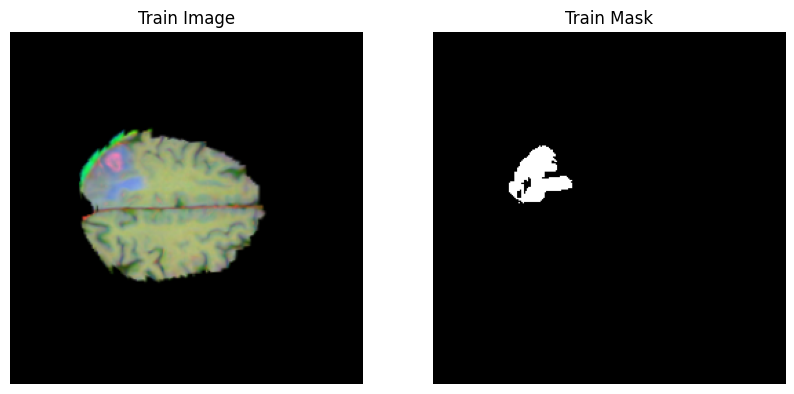

In [ ]:
import matplotlib.pyplot as plt


for images, masks in train_dataset.take(1):
    img = images[0].numpy()
    mask = masks[0].numpy().squeeze()


    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Train Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.title("Train Mask")
    plt.axis('off')

    plt.show()


In [ ]:
history = model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=500,
)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.9914 - loss: 0.1836
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.9905 - loss: 0.1185
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.9911 - loss: 0.0639
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.9926 - loss: 0.0496
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.9901 - loss: 0.0486


In [ ]:
model.save("/content/drive/MyDrive/projects, courses and  internships/Brain_data/unet_model.h5")

In [ ]:
test_image_path = "/content/Brain_data/test/images/test_images/BRATS_485_slice100_no_tumor.png"

In [ ]:
!ls /content/Brain_data/test/images/test_images | head

BRATS_485_slice0_no_tumor.png
BRATS_485_slice100_no_tumor.png
BRATS_485_slice101_no_tumor.png
BRATS_485_slice102_no_tumor.png
BRATS_485_slice103_no_tumor.png
BRATS_485_slice104_no_tumor.png
BRATS_485_slice105_no_tumor.png
BRATS_485_slice106_no_tumor.png
BRATS_485_slice107_no_tumor.png
BRATS_485_slice108_no_tumor.png


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/projects, courses and  internships/Brain_data/unet_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Tumor area ratio: 0.1622
Result: Tumor Detected


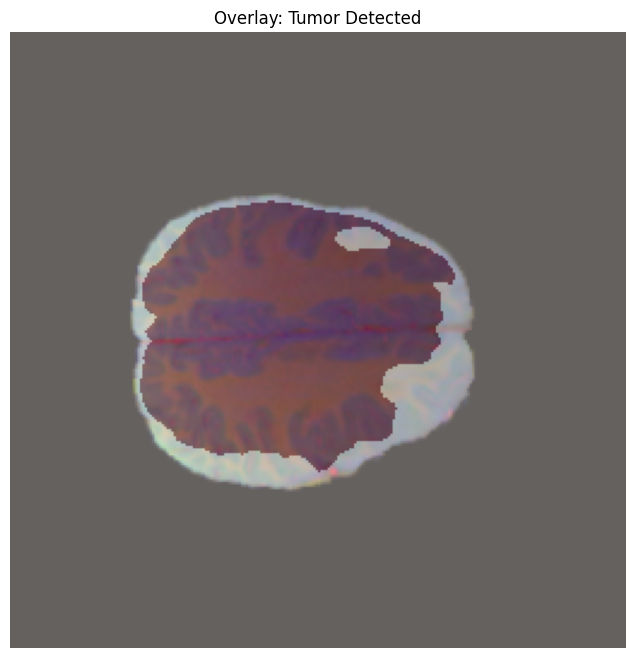

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_HEIGHT = 256
IMG_WIDTH = 256


test_image_path = "/content/Brain_data/test/images/test_images/BRATS_485_slice104_no_tumor.png"


img = tf.io.read_file(test_image_path)
img = tf.image.decode_png(img, channels=3)
img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
img = tf.cast(img, tf.float32) / 255.0

img_batch = tf.expand_dims(img, 0)


pred_mask = model.predict(img_batch)[0]
pred_mask = tf.squeeze(pred_mask)
binary_mask = tf.cast(pred_mask > 0.5, tf.float32)


tumor_area = tf.reduce_sum(binary_mask).numpy()
total_area = IMG_HEIGHT * IMG_WIDTH

tumor_ratio = tumor_area / total_area

if tumor_ratio > 0.01:
    tumor_label = "Tumor Detected"
else:
    tumor_label = "No Tumor Detected"

print(f"Tumor area ratio: {tumor_ratio:.4f}")
print(f"Result: {tumor_label}")


plt.figure(figsize=(8, 8))
plt.imshow(img.numpy())
plt.imshow(binary_mask.numpy(), cmap='Reds', alpha=0.4)
plt.title(f"Overlay: {tumor_label}")
plt.axis('off')
plt.show()
